### The first thing to do is load all the libraries and dataset that we'll be using.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
df.shape

(96453, 12)

In [7]:
df['Formatted Date'].value_counts()

2010-08-02 17:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 06:00:00.000 +0200    2
2010-08-02 07:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-02-26 18:00:00.000 +0100    1
2006-06-02 11:00:00.000 +0200    1
2007-03-09 19:00:00.000 +0100    1
2006-12-26 08:00:00.000 +0100    1
2014-11-01 00:00:00.000 +0100    1
Name: Formatted Date, Length: 96429, dtype: int64

### Drop the columns that we will no longer be using.

In [8]:
df=df.drop(['Daily Summary','Wind Bearing (degrees)', 'Summary', 'Precip Type', 'Temperature (C)', 'Loud Cover', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)'], axis=1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


### Checking null values.

In [9]:
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

### Normalizing the data.

In [10]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [11]:
df=df.set_index('Formatted Date')

In [12]:
data=df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


### Graphical representation of data.

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

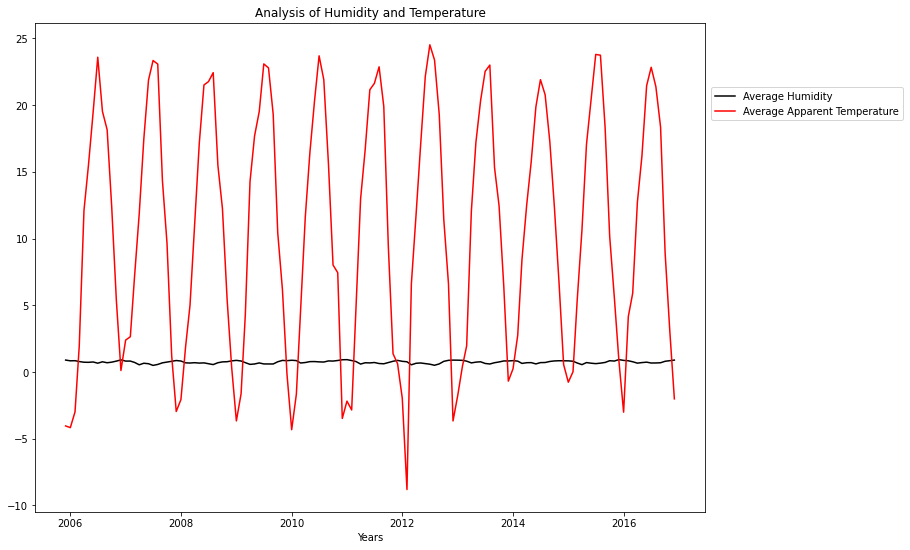

In [14]:
plt.figure(figsize=(12,9))
plt.title("Analysis of Humidity and Temperature")
plt.plot(data['Humidity'],label="Average Humidity",color='Black')
plt.plot(data['Apparent Temperature (C)'],label="Average Apparent Temperature",color='Red')
plt.xlabel("Years")
plt.legend(loc=(1.01,0.8))
plt.show()

### The graph above shows the daywise apparent temperature of 10 years(i.e. 2006-2016).

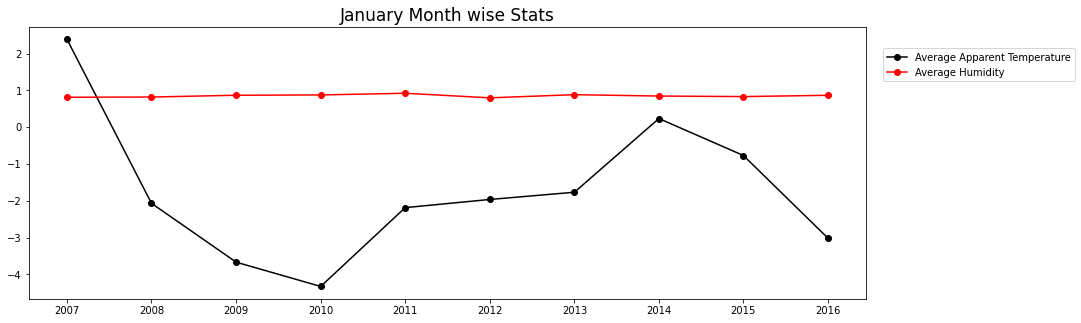

In [15]:
jan=data[data.index.month==1]
plt.figure(figsize=(15,5))
plt.title("January Month wise Stats",fontsize=17)
plt.plot(jan.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(jan.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

As we can see that Average Apparent Temperature in January is somewhat getting affected and is most affected in 2007 and the avg temp is also decreased by 1 degree from 2006 to 2016.

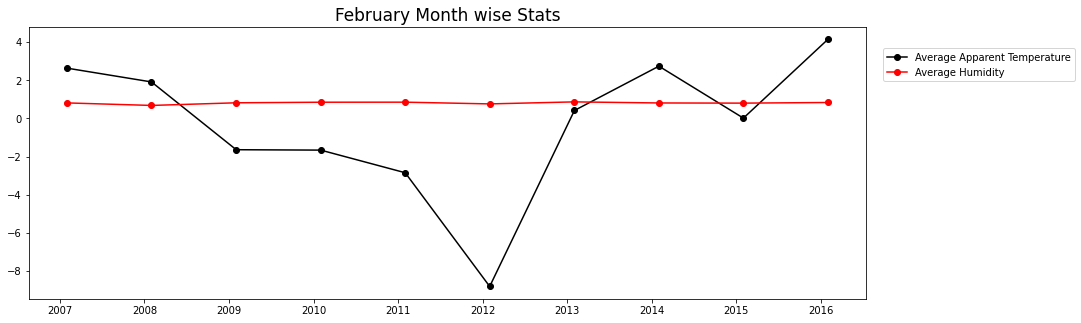

In [16]:
feb=data[data.index.month==2]
plt.figure(figsize=(15,5))
plt.title("February Month wise Stats",fontsize=17)
plt.plot(feb.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(feb.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

As we know that in the month of February temp remains somewhat low but we can see from the figure that the average app. temperature has risen too much from 2006 to 2016.

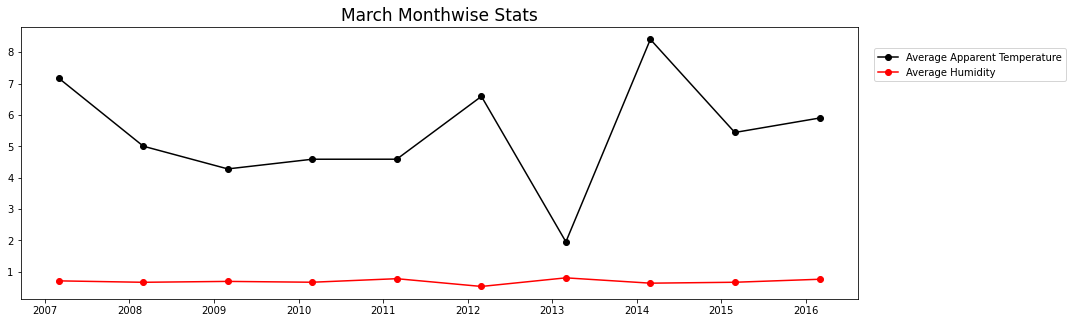

In [17]:
mar=data[data.index.month==3]
plt.figure(figsize=(15,5))
plt.title("March Monthwise Stats",fontsize=17)
plt.plot(mar.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(mar.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

We can see from the figure that the average app. temperature has risen too much from 2006 to 2016 and thus is affected by the Global Warming.

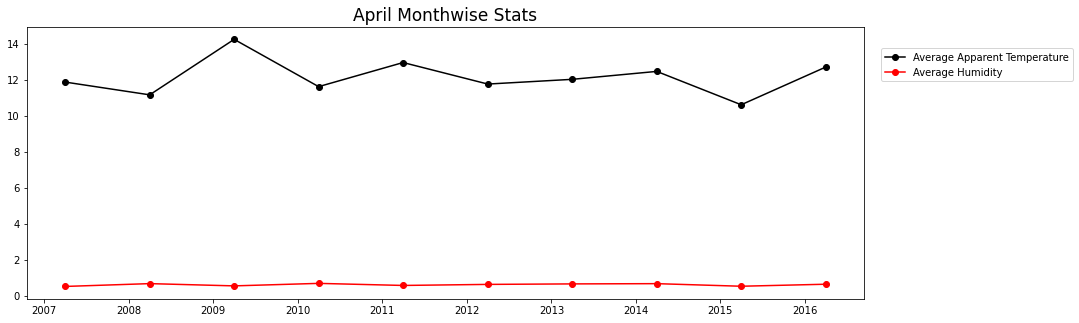

In [18]:
april=data[data.index.month==4]
plt.figure(figsize=(15,5))
plt.title("April Monthwise Stats",fontsize=17)
plt.plot(april.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(april.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

The Average app. Temperature rises in between but gets stable by 2016.

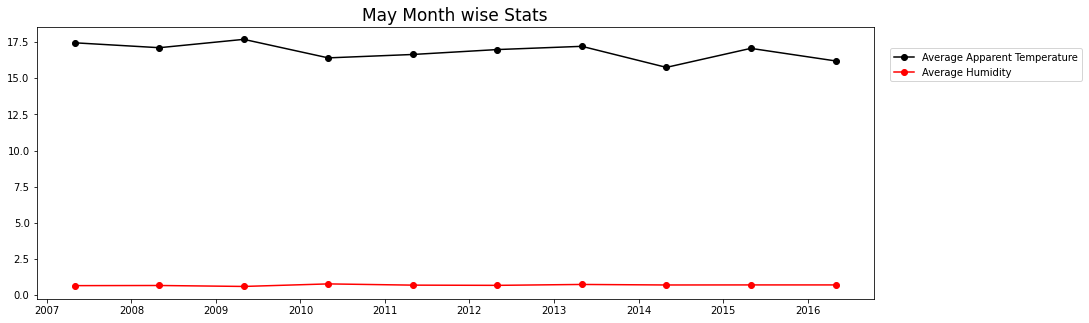

In [19]:
may=data[data.index.month==5]
plt.figure(figsize=(15,5))
plt.title("May Month wise Stats",fontsize=17)
plt.plot(may.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(may.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

The Average app. temperature is somewhat constant throughout the years.

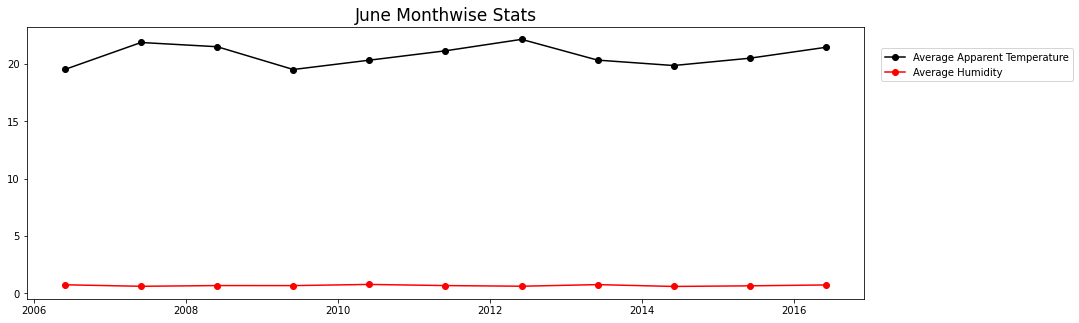

In [20]:
june=data[data.index.month==6]
plt.figure(figsize=(15,5))
plt.title("June Monthwise Stats",fontsize=17)
plt.plot(june.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(june.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

We can see that average app temperature rises in between and is unstable throughout this span.

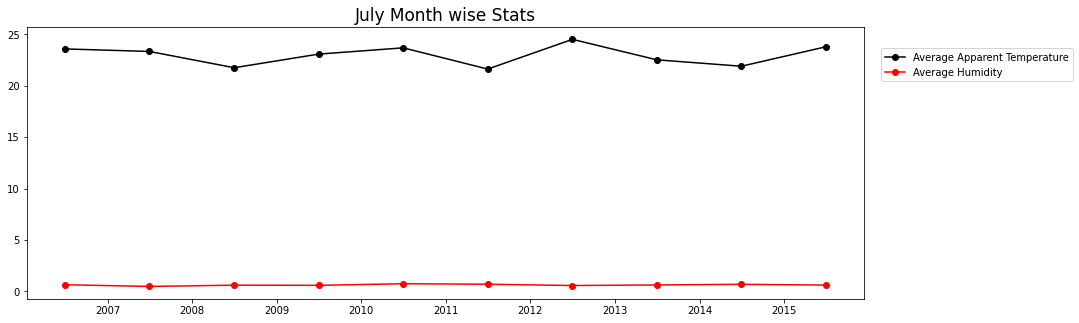

In [21]:
july=data[data.index.month==7]
plt.figure(figsize=(15,5))
plt.title("July Month wise Stats",fontsize=17)
plt.plot(july.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(july.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

We can see that average app temperature rises in between and is unstable throughout this span but no change in Average app. temperature seen.

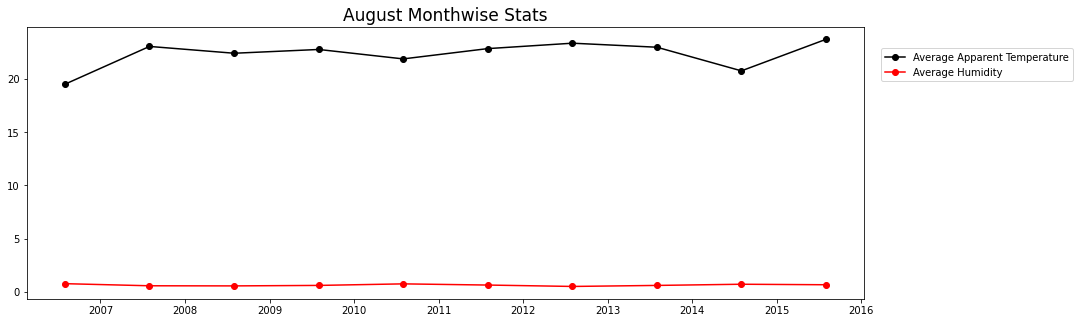

In [22]:
aug=data[data.index.month==8]
plt.figure(figsize=(15,5))
plt.title("August Monthwise Stats",fontsize=17)
plt.plot(aug.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(aug.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

We can see a constant rise in the Average app. temperature graph.

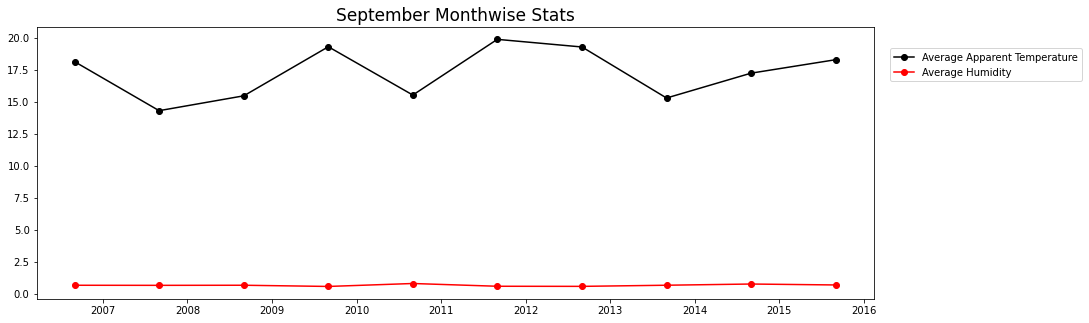

In [23]:
sep=data[data.index.month==9]
plt.figure(figsize=(15,5))
plt.title("September Monthwise Stats",fontsize=17)
plt.plot(sep.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(sep.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

This graph is also unstable and shows the unstability of temperature.

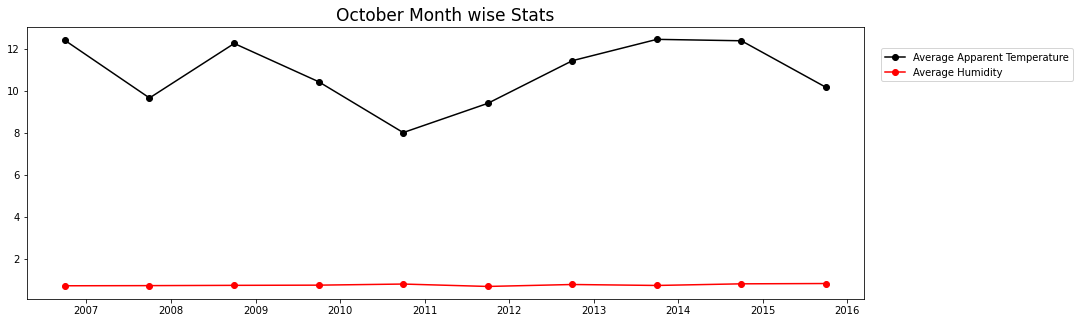

In [24]:
oct=data[data.index.month==10]
plt.figure(figsize=(15,5))
plt.title("October Month wise Stats",fontsize=17)
plt.plot(oct.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(oct.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

This graph is also unstable and shows the unstability of temperature.

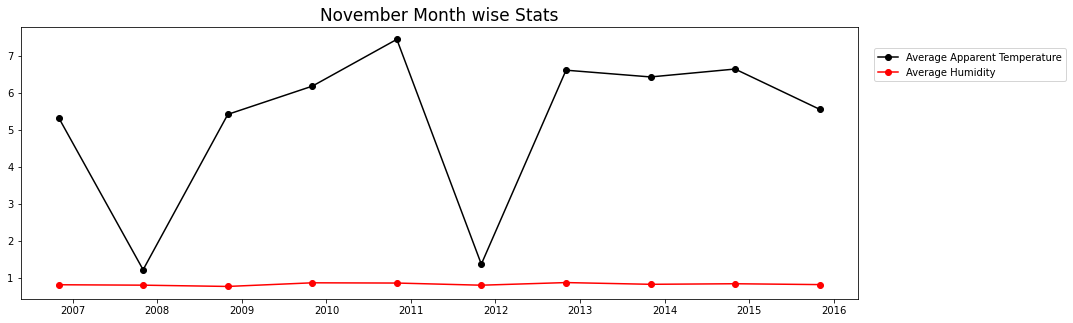

In [25]:
nov=data[data.index.month==11]
plt.figure(figsize=(15,5))
plt.title("November Month wise Stats",fontsize=17)
plt.plot(nov.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(nov.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

From the above two graphs we can see that the temperature sharply falls from October(i.e. 12 degrees ) to November(i.e. 3 degrees). And both the graphs are also too unstable showing the affect of Global Warming.

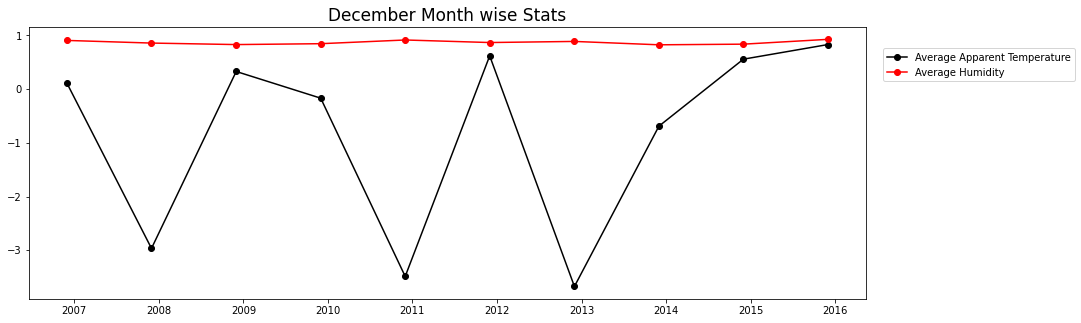

In [26]:
dec=data[data.index.month==12]
plt.figure(figsize=(15,5))
plt.title("December Month wise Stats",fontsize=17)
plt.plot(dec.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],label="Average Apparent Temperature",marker="o",color='Black')
plt.plot(dec.loc['2006-06-01':'2016-06-01','Humidity'],label="Average Humidity",marker="o",color='Red')
plt.legend(loc=(1.02,0.8))
plt.show()

We can see a rise in the Average app. temperature

## CONCLUSION:
Global warming is one of the major concerns for rising in the climatic variations and affecting various parameters of the environment. From this analysis, we can state that there is either a sharp rise in temperatures or sharp falls over the 10 years.From the above visualization it is clear that there is a markable change in the Average Apparent Temperature due to Global Warming. The humidity remains approximately constant throughout the time span.Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability also taking humidity into consideration we can say that it has almost remained the same throughout the past years.
